# Assigning probabilities

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Scale parameters and symmetry invariance

In [38]:
# straight line model with fixed intercept at y=x=0.
uniformSamples = np.random.uniform(size=200).reshape(1,-1)

# Collect samples from three different priors in a dictionary
# 1. uniform [0,10]
# 2. Jeffrey's prior; uniform in log [0.01,10]
# 3. Symmetry x <-> y; uniform in angle
#                      max slope = 10 => sin(arctan(10)) = 0.995
priorSamplesSlope = {'uniform': 10*uniformSamples, #[0,10]
                     'scale': 10**(3*uniformSamples-2), #[0.01,10]
                     'symmetry': np.tan(np.arcsin(0.995*uniformSamples))}

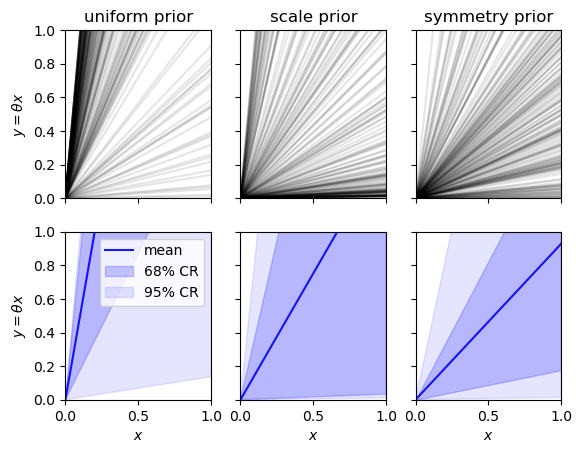

In [39]:
# Consider x in [0,1]
xLinspace = np.array([0,1]).reshape(-1,1)

# Set up figure with three columns (one per prior)
# First row with prior straight-line model samples
# Second row with prior predictive distribution
fig_slopeSamples, axs = plt.subplots(nrows=2,ncols=3,sharey=True, sharex=True)

for iax, (prior,slopes) in enumerate(priorSamplesSlope.items()):
    ax=axs[0,iax]
    ax.plot(xLinspace, xLinspace*slopes, color='k', alpha=0.1)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel(r'$y = \theta x$')
    ax.set_title(f'{prior} prior')

for iax, (prior,slopes) in enumerate(priorSamplesSlope.items()):
    ax=axs[1,iax]
    ax.plot(xLinspace, (xLinspace*slopes).mean(axis=1), color='b', alpha=0.9,label='mean')
    ax.fill_between(xLinspace.flatten(), np.percentile(xLinspace*slopes, 16.,axis=1), 
                    np.percentile(xLinspace*slopes, 84.,axis=1), color='b', alpha=0.2,
                   label='68% CR')
    ax.fill_between(xLinspace.flatten(), np.percentile(xLinspace*slopes, 2.5,axis=1), 
                    np.percentile(xLinspace*slopes, 97.5,axis=1), color='b', alpha=0.1,
                   label='95% CR')
    ax.set_xlim(0,1)
    ax.set_ylim(0,1.)
    ax.set_xlabel(r'$x$')
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel(r'$y = \theta x$')
        ax.legend(loc='best')

## The entropy of Scandinavians

We can construct a 2x2 contingency table for the characteristics of Scandinavians. Note that we know that 70% are blonde and 10% are left handed. Together with the normalization condition the only remaining unknown is $x \in [0,0.1].$

|  | Left-handed | NOT Left-handed |
|:--------:|:--------:|:--------:|
|  Blonde   |  $p_1=x$  |  $p_2=0.7-x$   |
|  NOT Blonde   |  $p_3=0.1-x$   |  $p_4=0.2+x$  |

In [59]:
eps=10**-9
xprob=np.linspace(eps,0.1-eps,100)
p = np.array([xprob,0.7-xprob,0.1-xprob,0.2+xprob])

In [60]:
p.shape

(4, 100)

In [61]:
S = -np.sum(p*np.log(p),axis=0)

In [62]:
S.shape

(100,)

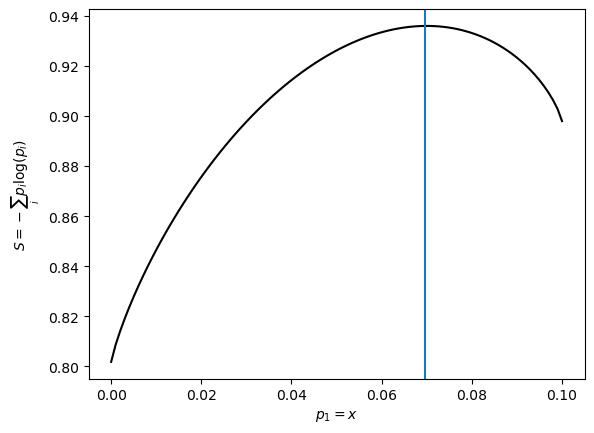

In [63]:
fig, ax = plt.subplots(nrows=1,ncols=1,sharey=True, sharex=True)

ax.plot(xprob, S, color='k')
ax.axvline(x=xprob[np.argmax(S)])
ax.set_ylabel(r'$S = -\sum_i p_i \log(p_i)$')
ax.set_xlabel(r'$p_1=x$');